In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
data_dir = r"S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\2D Data"
bc_folders = ['B.C. 320', 'B.C. 350', 'B.C. 360', 'B.C. 380', 'B.C. 390', 'B.C. 400']

In [3]:
all_temp_data = [] # Empty list to hold all temperature data

# Loop over folders
for folder in bc_folders:
    folder_path = os.path.join(data_dir, folder)
    
    # Search for temp.csv file inside the folder
    for filename in os.listdir(folder_path):
        if filename.lower().endswith('temp.csv'):
            file_path = os.path.join(folder_path, filename)
            
            df = pd.read_csv(file_path)
            df.columns = ['x', 'y', 'Temperature'] 
            df['BC'] = int(folder.split('.')[-1]) # Creating the B.C. column
            all_temp_data.append(df)

# Combine all
df = pd.concat(all_temp_data, ignore_index=True)

In [4]:
df.shape

(1738800, 4)

In [5]:
print("Sample temperature data:")
df.head(1391046)

Sample temperature data:


,x,y,Temperature,BC
0,0.096000,0.180003,300.0,320
1,0.096002,0.181001,300.0,320
2,0.095002,0.181004,300.0,320
3,0.094999,0.180003,300.0,320
4,0.095999,0.182005,300.0,320
...,...,...,...,...
1391041,0.000000,0.297000,300.0,390
1391042,0.000000,0.298000,300.0,390
1391043,0.000000,0.299000,300.0,390
1391044,0.000000,0.300000,300.0,390


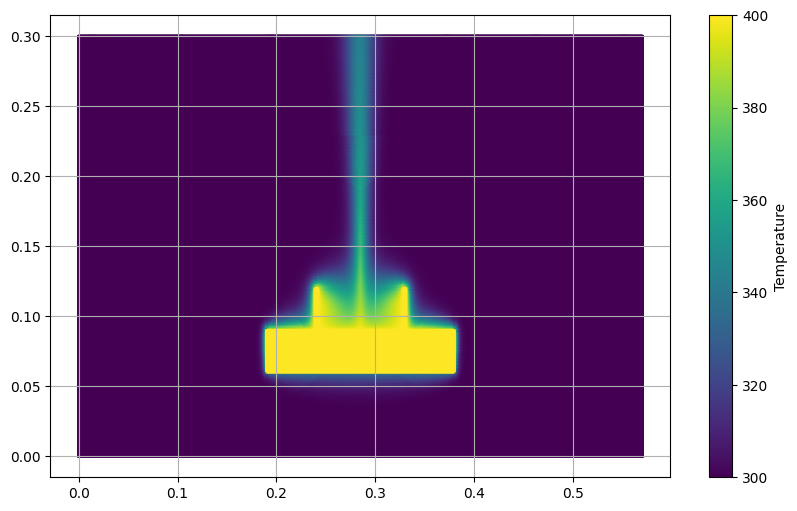

In [6]:
plt.figure(figsize = (10, 6))
plt.scatter(df['x'], df['y'], c = df['Temperature'], cmap = 'viridis', s = 1)
plt.colorbar(label = 'Temperature')
plt.grid(True)
plt.show()

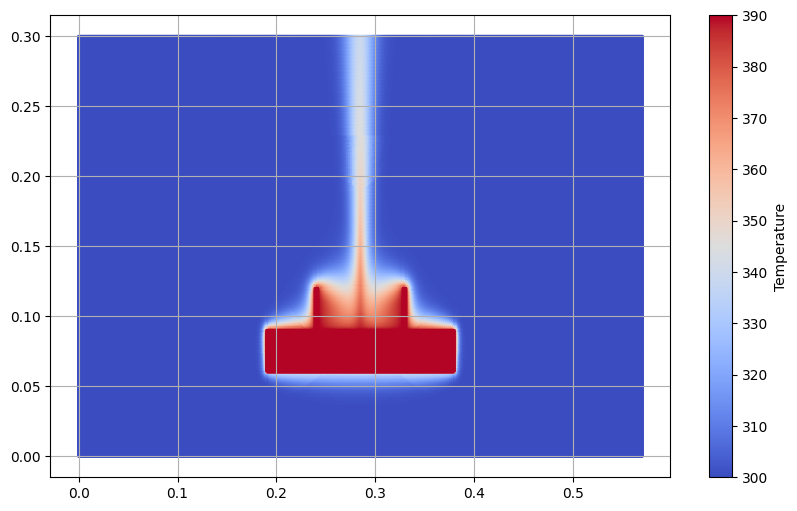

In [7]:
bc_value = 390
df_bc = df[df['BC'] == bc_value]

plt.figure(figsize = (10, 6))
plt.scatter(df_bc['x'], df_bc['y'], c = df_bc['Temperature'], cmap = 'coolwarm', s = 1)
plt.colorbar(label = 'Temperature')
plt.grid(True)
plt.show()

In [ ]:
# Get unique boundary conditions sorted
unique_bcs = sorted(df['BC'].unique())

# Set up subplots
n_cols = 2
n_rows = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize = (15, 12))
axes = axes.flatten() # Flatten the 2D array of axes to 1D array

# Loop through B.C.s and plot
for idx, bc_val in enumerate(unique_bcs):
    df_bc = df[df['BC'] == bc_val]
    
    ax = axes[idx]
    scatter = ax.scatter(df_bc['x'], df_bc['y'], c = df_bc['Temperature'], cmap = 'gist_rainbow', s = 30)
    ax.set_title(f'B.C. = {bc_val}')
    ax.set_xlabel('x position')
    ax.set_ylabel('y position')
    ax.grid(True)
    cbar = fig.colorbar(scatter, ax = ax)
    cbar.set_label('Temperature')

plt.tight_layout()
plt.show()